In [1]:
import numpy as np
from thermodynamics.mix.equilibrium import solve_eos, bubble_temperature,bubble_pressure, dew_pressure, dew_temperature, flash
t=350
p=13.253461386909118

tc = np.array([513.92,407.85])
pc=np.array([61.48,36.4])
acentric=np.array([0.649,0.186])
kij=np.array([[0,0.2],[0.2,0]])
liq_compositions=np.array([0.25,0.75])
vap_compositions=np.array([0.25,0.75])
shape=kij.shape

#A_liq,B_liq,A_i_liq,Aij_liq,dAdT_liq

In [2]:

solve_eos(t,p,tc,pc,acentric,liq_compositions,vap_compositions,kij,method='pr',alfa_function='mathias',mixing_rule='van_der_waals',diagram=False,properties=False,heat_capacities=None)

(array([0.30762405, 0.81914298]), array([0.76307454, 0.79436974]))

In [3]:
t=350
p=10
bubble_pressure(t,p,tc,pc,acentric,liq_compositions,vap_compositions,kij,method='pr',alfa_function='mathias',mixing_rule='van_der_waals')

(350, 11.02665697896571, array([0.25, 0.75]), array([0.11132717, 0.88867283]))

In [4]:
t=350
p=10
bubble_temperature(t,p,tc,pc,acentric,liq_compositions,vap_compositions,kij,method='pr',alfa_function='mathias',mixing_rule='van_der_waals')


(345.7082603200856, 10, array([0.25, 0.75]), array([0.10577799, 0.89422201]))

In [5]:
t=350
p=10
dew_pressure(t,p,tc,pc,acentric,liq_compositions,vap_compositions,kij,method='pr',alfa_function='mathias',mixing_rule='van_der_waals')

(350, 2.918142507464585, array([0.99501767, 0.00498233]), array([0.25, 0.75]))

In [6]:
t=350
p=10
dew_temperature(t,p,tc,pc,acentric,liq_compositions,vap_compositions,kij,method='pr',alfa_function='mathias',mixing_rule='van_der_waals')

(379.82587841259084, 10, array([0.97856396, 0.02143604]), array([0.25, 0.75]))

In [7]:
t=350
p=10
v_f=0.3
feed_compositions =np.array([0.25,0.25,0.5])
liq_compositions=np.array([0.25,0.25,0.5])
vap_compositions=np.array([0.25,0.25,0.5])
#flash(t,p,tc,pc,acentric,feed_compositions,liq_compositions,vap_compositions,v_f,kij,method='pr',alfa_function='mathias',mixing_rule='van_der_waals')

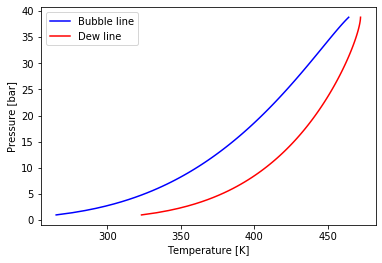

In [8]:
from thermodynamics.mix.diagrams import pt
tc = np.array([96.748+273.15,134.946+273.15,187.248+273.15,234.748+273.15])
pc=np.array([42.5666,36.4762,33.3359,30.3162])
acentric=np.array([0.1524,0.18479,0.22224,0.3007])
kij=np.array([[0,0.00104,0.00258,0.00514],[0.00104,0,0.00035,0.00157],[0.00258,0.00035,0,0.00044],[0.00514,0.00157,0.00044,0]])
liq_compositions=np.array([0.2,0.2,0.1,0.5])
vap_compositions=np.array([0.2,0.2,0.1,0.5])

pt(tc,pc,acentric,liq_compositions,vap_compositions,kij)

In [18]:
from thermodynamics.mix.binaryDiagrams import pressure_composition
t=350
tc = np.array([562.05,591.75])
pc=np.array([48.95,41.08])
acentric=np.array([0.209,0.264])
kij=np.array([[0,0.00053],[0.00053,0]])

bubble_line, dew_line = pressure_composition(t,tc,pc,acentric,kij,atomo4=True)

for ele in bubble_line[0]:
    print(float(ele))

0.0
0.010101010101010102
0.020202020202020204
0.030303030303030304
0.04040404040404041
0.05050505050505051
0.06060606060606061
0.07070707070707072
0.08080808080808081
0.09090909090909091
0.10101010101010102
0.11111111111111112
0.12121212121212122
0.13131313131313133
0.14141414141414144
0.15151515151515152
0.16161616161616163
0.17171717171717174
0.18181818181818182
0.19191919191919193
0.20202020202020204
0.21212121212121213
0.22222222222222224
0.23232323232323235
0.24242424242424243
0.25252525252525254
0.26262626262626265
0.27272727272727276
0.2828282828282829
0.29292929292929293
0.30303030303030304
0.31313131313131315
0.32323232323232326
0.33333333333333337
0.3434343434343435
0.3535353535353536
0.36363636363636365
0.37373737373737376
0.38383838383838387
0.393939393939394
0.4040404040404041
0.4141414141414142
0.42424242424242425
0.43434343434343436
0.4444444444444445
0.4545454545454546
0.4646464646464647
0.4747474747474748
0.48484848484848486
0.494949494949495
0.5050505050505051
0.51515

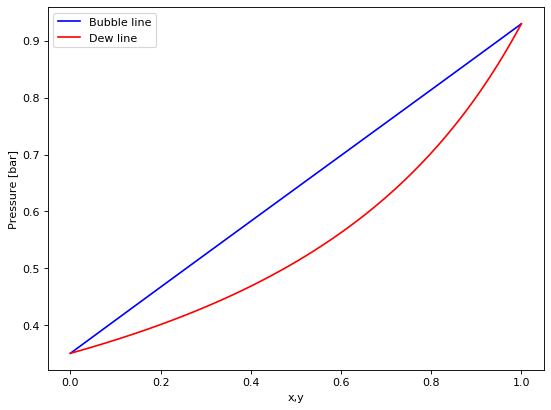

In [19]:
pressure_composition(t,tc,pc,acentric,kij)

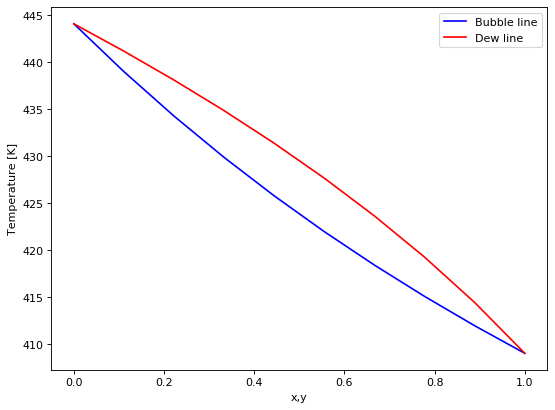

In [10]:
from thermodynamics.mix.binaryDiagrams import temperature_composition
p=4.3
tc = np.array([562.05,591.75])
pc=np.array([48.95,41.08])
acentric=np.array([0.209,0.264])
kij=np.array([[0,0.00053],[0.00053,0]])

temperature_composition(p,tc,pc,acentric,kij,points=10)

In [11]:
p=1
t=350

#benceno - tolueno
tc = np.array([591.75,562.05])
pc=np.array([41.08,48.95])
acentric=np.array([0.264,0.209])
kij=np.array([[0,0.00053],[0.00053,0]])


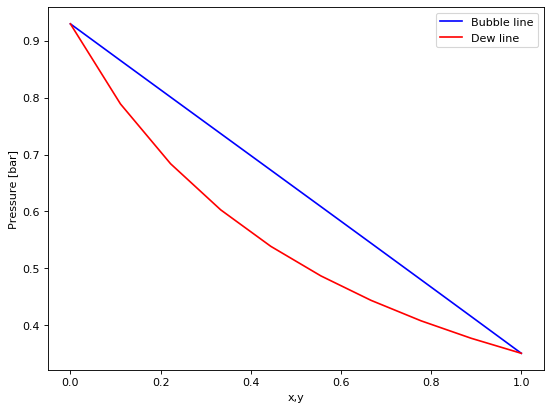

In [12]:
pressure_composition(t,tc,pc,acentric,kij,points=10)

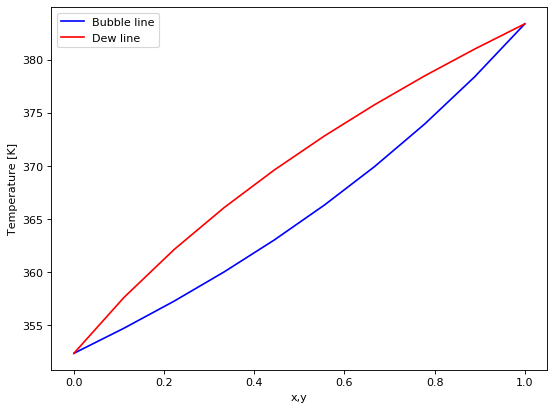

In [13]:
temperature_composition(1,tc,pc,acentric,kij,points=10)

In [14]:
a= [None, None]

In [15]:
a

[None, None]